# PREDIKSI JENIS KENDARAAN BERDASARKAN SILUET KENDARAAN

# Pendahuluan

Data ini dikumpulkan di Texas Instruments dan didanai sebagian oleh Barr and Stroud Ltd. Tujuannya adalah untuk membedakan objek 3D dalam gambar 2D menggunakan fitur bentuk dari siluet 2D. Empat model kendaraan "Corgie" digunakan: bus tingkat, van Chevrolet, Saab 9000, dan Opel Manta 400. Kendaraan difoto dari sudut tetap dengan berbagai orientasi untuk menghasilkan dataset yang beragam. 

Tujuan modul ini adalah mengklasifikasikan siluet kendaraan menjadi salah satu dari empat jenis kendaraan (bus, van, Saab 9000, dan Opel Manta 400) menggunakan fitur-fitur yang diekstraksi dari siluet.

# Data Understanding

## Sumber Data

Dataset Statlog (Vehicle Silhouettes) didapat dari UCI dataset (https://archive.ics.uci.edu/dataset/149/statlog+vehicle+silhouettes)

Statlog (Vehicle Silhouettes) adalah dataset Siluet Kendaraan yang diperoleh dari Texas Instruments dan didanai sebagian oleh Barr and Stroud Ltd

Siebert, J.P. (1987). Vehicle Recognition Using Rule Based Methods.

## Integrasi Data

Untuk mengambil data agar dapat diolah perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk mengambil data yang berasal dari UCI dataset agar dapat diolah.  Peritah untuk mengambil data dari UCI dataset dapat di lihat ketika kita menekan tombol import in python pada dataset yang diinginkan dan perlu mengikuti perintah tersebut agar data dapat diambil dari UCI dataset. Pengambilan data seperti berikut :

In [ ]:
pip install ucimlrepo


[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder

# Fetch dataset
statlog_vehicle_silhouettes_original = fetch_ucirepo(id=149)

# Data (as pandas dataframes)
data = statlog_vehicle_silhouettes_original.data.original

# Menghapus baris yang memiliki nilai class 204
data = data[data['class'] != '204']

# Menyimpan hasil komputasi ke dalam CSV
data.to_csv("statlog_vehicle.csv", index=False)

Data akan disimpan dalam bentuk csv dengan nama statlog_vehicle.csv

## Eksplorasi Data

### Visualisasi Data

Untuk memudahkan dalam memahami dataset , ada baiknya ditampilkan dengan visual yang dapat dipahami oleh semua orang. Pada visualisasi data lakukan perintah berikut agar tampilan data dapat dipahami dengan lebih mudah.

In [ ]:
display(data)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO,class
0,95.0,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91.0,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104.0,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93.0,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85.0,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,89.0,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106.0,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,86.0,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


/tmp/ipykernel_75/3742071262.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=data, palette='viridis')


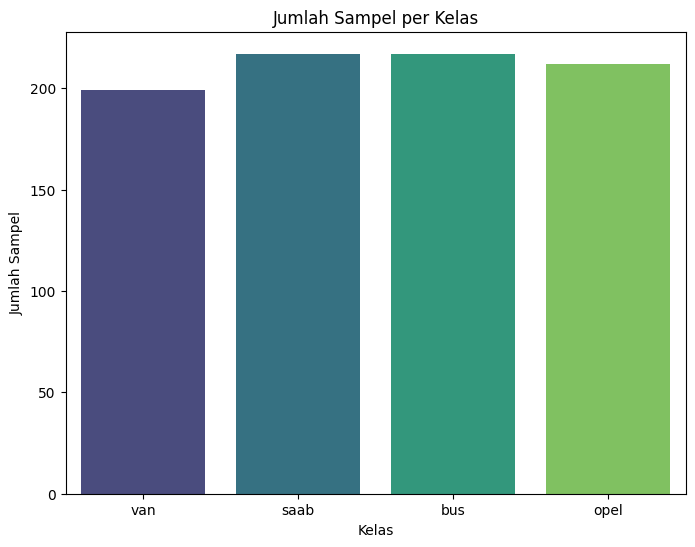

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data, palette='viridis')
plt.title('Jumlah Sampel per Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.show()

<Figure size 1200x1000 with 0 Axes>

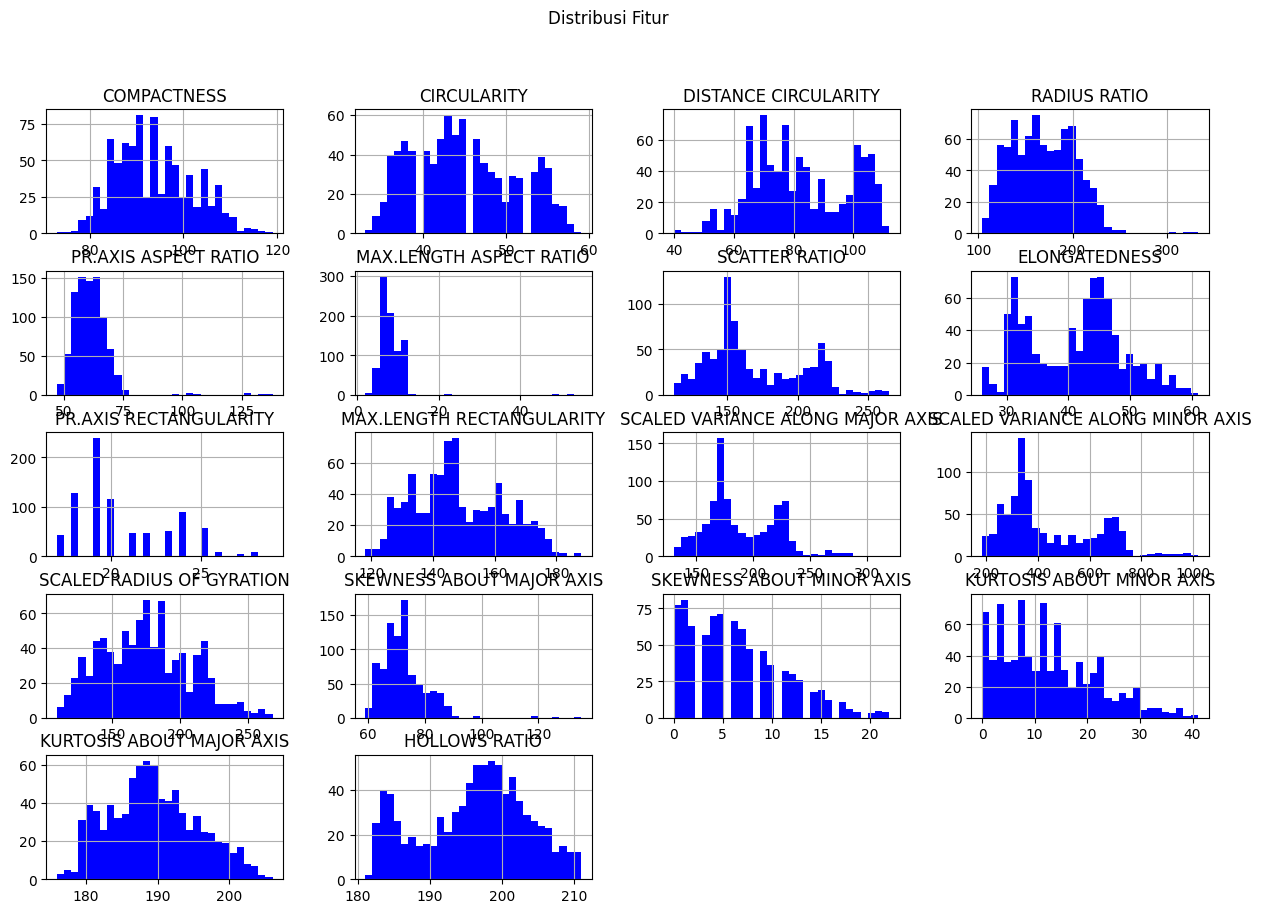

In [ ]:
# Visualisasi distribusi fitur dengan histogram
plt.figure(figsize=(12, 10))
data.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle('Distribusi Fitur')
plt.show()

## Struktur Dataset

### Fitur dan Label

Fitur merupakan ciri-ciri yang digunakan untuk menentukan klasifikasi suatu data, pada dataset ini fitur yang ada akan berhubungan dan digunakan untuk mengidentifikasi apakah siluet kendaraan termasuk dalam jenis kendaraan bus, van, Saab 9000, dan Opel Manta 400.

Fitur pada dataset ada 18 :

COMPACTNESS: Rasio kuadrat keliling rata-rata terhadap luas.
CIRCULARITY: Rasio kuadrat radius rata-rata terhadap luas.
DISTANCE CIRCULARITY: Rasio luas terhadap kuadrat jarak rata-rata dari tepi.
RADIUS RATIO: Rasio perbedaan radius maksimum dan minimum terhadap radius rata-rata.
PR.AXIS ASPECT RATIO: Rasio sumbu minor terhadap sumbu mayor.
MAX.LENGTH ASPECT RATIO: Rasio panjang tegak lurus terhadap panjang maksimum.
SCATTER RATIO: Rasio inersia terhadap sumbu minor dan mayor.
ELONGATEDNESS: Rasio luas terhadap kuadrat lebar yang menyusut.
PR.AXIS RECTANGULARITY: Rasio luas terhadap panjang dan lebar sumbu utama.
MAX.LENGTH RECTANGULARITY: Rasio luas terhadap panjang maksimum dan panjang tegak lurus.
SCALED VARIANCE ALONG MAJOR AXIS: Variansi orde kedua terhadap luas pada sumbu mayor.
SCALED VARIANCE ALONG MINOR AXIS: Variansi orde kedua terhadap luas pada sumbu minor.
SCALED RADIUS OF GYRATION: Jumlah variansi mayor dan minor terhadap luas.
SKEWNESS ABOUT MAJOR AXIS: Skewness orde ketiga terhadap kubus deviasi standar pada sumbu mayor.
SKEWNESS ABOUT MINOR AXIS: Skewness orde ketiga terhadap kubus deviasi standar pada sumbu minor.
KURTOSIS ABOUT MINOR AXIS: Kurtosis orde keempat terhadap pangkat empat deviasi standar pada sumbu minor.
KURTOSIS ABOUT MAJOR AXIS: Kurtosis orde keempat terhadap pangkat empat deviasi standar pada sumbu mayor.
HOLLOWS RATIO: Rasio luas rongga terhadap luas poligon pembatas.

Label pada dataset :

Data ini memiliki empat kelas atau jenis kendaraan:

OPEL
SAAB
BUS
VAN

Struktur dataset perlu  diketahui juga untuk mengelola data nantinya, perlu mengetahui apakah ada berapa data pada dataset, dan ada berapa fitur juga. Karena data dan fitur akan sangat berhubungan dengan model yang akan dibuat nantinya. Berikut cara untuk mengetahui struktur data dan penjelasannya.

In [ ]:
data.shape #untuk mengetahui bentuk dataset(baris & kolom)

(845, 19)

In [ ]:
data.columns #untuk mengetahui kolom-kolom yang ada pada dataset

Index(['COMPACTNESS', 'CIRCULARITY', 'DISTANCE CIRCULARITY', 'RADIUS RATIO',
       'PR.AXIS ASPECT RATIO', 'MAX.LENGTH ASPECT RATIO', 'SCATTER RATIO',
       'ELONGATEDNESS', 'PR.AXIS RECTANGULARITY', 'MAX.LENGTH RECTANGULARITY',
       'SCALED VARIANCE ALONG MAJOR AXIS', 'SCALED VARIANCE ALONG MINOR AXIS',
       'SCALED RADIUS OF GYRATION', 'SKEWNESS ABOUT MAJOR AXIS',
       'SKEWNESS ABOUT MINOR AXIS', 'KURTOSIS ABOUT MINOR AXIS',
       'KURTOSIS ABOUT MAJOR AXIS', 'HOLLOWS RATIO', 'class'],
      dtype='object')

In [ ]:
data.dtypes #untuk mengetahui tipe data dari masing-masing kolom

COMPACTNESS                         float64
CIRCULARITY                           int64
DISTANCE CIRCULARITY                  int64
RADIUS RATIO                          int64
PR.AXIS ASPECT RATIO                  int64
MAX.LENGTH ASPECT RATIO               int64
SCATTER RATIO                         int64
ELONGATEDNESS                         int64
PR.AXIS RECTANGULARITY                int64
MAX.LENGTH RECTANGULARITY             int64
SCALED VARIANCE ALONG MAJOR AXIS      int64
SCALED VARIANCE ALONG MINOR AXIS      int64
SCALED RADIUS OF GYRATION             int64
SKEWNESS ABOUT MAJOR AXIS             int64
SKEWNESS ABOUT MINOR AXIS             int64
KURTOSIS ABOUT MINOR AXIS             int64
KURTOSIS ABOUT MAJOR AXIS             int64
HOLLOWS RATIO                         int64
class                                object
dtype: object

In [ ]:
data.groupby('class').size() #untuk mengetahui jumlah masing-masing class

class
bus     217
opel    212
saab    217
van     199
dtype: int64

## Identifikasi Kualitas Data

### Pendeteksian Missing Values

Missing value merupakan data yang hilang pada suatu dataset. Hal ini bisa terjadi oleh beberapa faktor, diantaranya adalah :

- Interviewer recording error terjadi akibat kelalaian petugas pengumpul data (pewawancara), misalnya ada sejumlah pertanyaan yang terlewatkan

- Respondent inability error terjadi akibat ketidakmampuan responden dalam memberikan jawaban akurat, misalnya karena tidak memahami pertanyaan, bosan atau kelelahan (respondent fatigue) akhirnya responden mengosongkan sejumlah pertanyaan atau berhenti mengisi kuesioner di tengah jalan. 

- Unwillingness respondent error terjadi karena responden tidak berkenan memberikan jawaban yang akurat, misalnya pertanyaan soal penghasilan, usia, berat badan, pengalaman melakukan pelanggaran hukum, dll.

Cara penanganan Missing Values :

- Mengabaikan dan membuang missing data

- Estimasi parameter

- Imputasi

Dalam modul kali ini akan mengecek apakah ada missing value , jika ada akan ditangani menggunakan metode imputasi, yang ada 2 metode yaitu menggunakan metode Mean dan menggunakan metode KNN.

Dilakukan pendeteksian missing values terlebih dahulu pada masing-masing kolom.

In [ ]:
import pandas as pd

# Detect rows with missing values
rows_with_missing = data[data.isnull().any(axis=1)]

# Tampilkan baris dengan nilai yang hilang beserta ID, fitur, dan labelnya
print("Rows with Missing Values:")
print(rows_with_missing)

# Detect missing values
missing_values = data.isnull()

# Hitung nilai yang hilang di setiap kolom
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing Value Counts:")
print(missing_counts)

Rows with Missing Values:
Empty DataFrame
Columns: [COMPACTNESS, CIRCULARITY, DISTANCE CIRCULARITY, RADIUS RATIO, PR.AXIS ASPECT RATIO, MAX.LENGTH ASPECT RATIO, SCATTER RATIO, ELONGATEDNESS, PR.AXIS RECTANGULARITY, MAX.LENGTH RECTANGULARITY, SCALED VARIANCE ALONG MAJOR AXIS, SCALED VARIANCE ALONG MINOR AXIS, SCALED RADIUS OF GYRATION, SKEWNESS ABOUT MAJOR AXIS, SKEWNESS ABOUT MINOR AXIS, KURTOSIS ABOUT MINOR AXIS, KURTOSIS ABOUT MAJOR AXIS, HOLLOWS RATIO, class]
Index: []
Missing Value Counts:
COMPACTNESS                         0
CIRCULARITY                         0
DISTANCE CIRCULARITY                0
RADIUS RATIO                        0
PR.AXIS ASPECT RATIO                0
MAX.LENGTH ASPECT RATIO             0
SCATTER RATIO                       0
ELONGATEDNESS                       0
PR.AXIS RECTANGULARITY              0
MAX.LENGTH RECTANGULARITY           0
SCALED VARIANCE ALONG MAJOR AXIS    0
SCALED VARIANCE ALONG MINOR AXIS    0
SCALED RADIUS OF GYRATION           0
SKEWNES

Dari pendeteksian missing values tersebut tidak ditemukan adanya missing values, sehingga tidak diperlukan penanganan seperti imputasi menggunakan mean atau KNN.

### Pendeteksian Outlier

Outlier/pencilan merupakan data pada dataset yang menyimpang dari data lainnya,mendeteksi outlier perlu agar data yang kita olah memberikan hasil yang baik pada model yang akan kita buat nantinya.outlier dapat diidentifikasi dan ditangani dengan beberapa cara antara lain yang akan kami gunakan yaitu LOF(Local Outlier Factor).

### Konsep Local Outlier Factor

Outlier adalah titik data yang berbeda atau jauh dari titik data lainnya. Local Outlier Factor (LOF) adalah algoritma yang mengidentifikasi outlier yang ada dalam kumpulan data. Ketika suatu titik dianggap sebagai outlier berdasarkan lingkungan lokalnya, maka titik tersebut disebut local outlier . LOF akan mengidentifikasi outlier dengan mempertimbangkan kepadatan lingkungan. LOF bekerja dengan baik ketika kepadatan data tidak sama di seluruh kumpulan data.

### Implementasi Local Outlier Factor dengan Scikit Learn

sedangkan untuk perhitungan melalui code sebagai berikut :

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# Membuat model LOF
lof = LocalOutlierFactor(n_neighbors=9, contamination=0.03)

data1 = data
data1 = data1.drop(columns=data1.columns[-1])

# Melakukan prediksi outlier untuk setiap fitur
outlier_indices = []
for column in data1.columns:
    # Mengambil nilai fitur
    feature_values = data1[column].values.reshape(-1, 1)
    # Melakukan prediksi outlier
    y_pred = lof.fit_predict(feature_values)
    # Menambahkan indeks outlier ke dalam daftar outlier_indices
    outlier_indices.extend([(i, column) for i, label in enumerate(y_pred) if label == -1])

# Menghilangkan indeks outlier yang duplikat
outlier_indices = list(set(outlier_indices))

# Menampilkan outlier untuk setiap fitur
# for column in data1.columns:
#     plt.scatter(range(len(data1[column])), data1[column], label=column)
#     plt.scatter(outlier_indices, data1[column].iloc[outlier_indices], color='r', label="Outlier")
#     plt.xlabel("Index")
#     plt.ylabel(column)
#     plt.title(f"Outlier Detection for {column}")
#     plt.legend()
#     plt.show()

# Menampilkan indeks outlier yang ditemukan
print("===================================== OUTLIER =====================================")
for i in outlier_indices:
    print(f"outlier ditemukan pada baris => {i[0]}, kolom => {i[1]}")

# Mengumpulkan indeks baris yang mengandung outlier
outlier_row_indices = [index[0] for index in outlier_indices]

# Menampilkan data pada baris yang mengandung outlier
outlier_data = data.iloc[outlier_row_indices]
print("===================================== DATA =====================================")
print("Data pada baris yang mengandung outlier:")
print(outlier_data)


# Mengasumsikan Anda memiliki labels outlier yang sesuai dengan indeks outlier yang Anda temukan
# Misalnya, dalam list ini, nilai 1 menunjukkan outlier, dan 0 menunjukkan bukan outlier
ground_truth_labels = [1 if i in outlier_row_indices else 0 for i in range(len(data))]

# Menghasilkan prediksi outlier berdasarkan outlier_row_indices
predicted_labels = [1 if i in outlier_row_indices else 0 for i in range(len(data))]

# Menghitung akurasi
precision = precision_score(ground_truth_labels, predicted_labels)

print("==================================== AKURASI ====================================")
print(f"akurasi: {precision}")

===================================== OUTLIER =====================================
outlier ditemukan pada baris => 283, kolom => DISTANCE CIRCULARITY
outlier ditemukan pada baris => 294, kolom => DISTANCE CIRCULARITY
outlier ditemukan pada baris => 167, kolom => SKEWNESS ABOUT MINOR AXIS
outlier ditemukan pada baris => 531, kolom => KURTOSIS ABOUT MINOR AXIS
outlier ditemukan pada baris => 675, kolom => SCALED VARIANCE ALONG MAJOR AXIS
outlier ditemukan pada baris => 135, kolom => SKEWNESS ABOUT MAJOR AXIS
outlier ditemukan pada baris => 283, kolom => COMPACTNESS
outlier ditemukan pada baris => 531, kolom => ELONGATEDNESS
outlier ditemukan pada baris => 564, kolom => MAX.LENGTH RECTANGULARITY
outlier ditemukan pada baris => 469, kolom => KURTOSIS ABOUT MAJOR AXIS
outlier ditemukan pada baris => 573, kolom => SCALED VARIANCE ALONG MINOR AXIS
outlier ditemukan pada baris => 396, kolom => HOLLOWS RATIO
outlier ditemukan pada baris => 226, kolom => RADIUS RATIO
outlier ditemukan pada bari

Dari hasil tersebut ditemukan sebanyak 359 baris yang mengandung outlier, untuk penanganan outlier bisa melakukan transformasi data dengan normalisasi data agar range data berkisar dari 0-1. Untuk akurasi pendeteksian outlier menunjukkan 1.0 yang berarti akurasinya sempurna dalam mendeteksi outlier.

# Preprocessing Data

## Transformasi Data

Mengubah label class menjadi angka sehingga nantinya class akan diwakili angka tersebut. Karena terdapat 4 class (bus, van, saab, dan opel) maka keempat class tersebut akan diwakili menjadi angka (0, 1, 2, 3).

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Memuat data yang sudah ada dalam variabel data
# print(data.info())  # Menampilkan info fitur-fitur yang ada di tabel
# print(data.head())  # Menampilkan 5 baris pertama

# Pra-pemrosesan
# Tangani missing values
if data.isnull().values.any():
    data['COMPACTNESS'].fillna(data['COMPACTNESS'].mean(), inplace=True)

# Encode label menjadi numerik
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

# Membuat dictionary untuk memetakan nilai numerik ke kelas asli
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
inverse_class_mapping = {v: k for k, v in class_mapping.items()}

# Periksa hasil transformasi
print(data.info())  # Menampilkan info fitur-fitur setelah transformasi
# print(data.head())  # Menampilkan 5 baris pertama setelah transformasi

# Menyimpan data yang telah ditransformasi ke dalam file CSV
data.to_csv("statlog_vehicle_transformed.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 845 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       845 non-null    float64
 1   CIRCULARITY                       845 non-null    int64  
 2   DISTANCE CIRCULARITY              845 non-null    int64  
 3   RADIUS RATIO                      845 non-null    int64  
 4   PR.AXIS ASPECT RATIO              845 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           845 non-null    int64  
 6   SCATTER RATIO                     845 non-null    int64  
 7   ELONGATEDNESS                     845 non-null    int64  
 8   PR.AXIS RECTANGULARITY            845 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         845 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  845 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  845 non-null    int64  
 12  SCALED RADIUS

## Normalisasi

Melakukan perubahan data agar range antar data tidak terlalu jauh, sehingga range data akan berkisar antar 0-1. Metode normalisasi yang digunakan yaitu menggunakan metode MinMaxScaler. Cara kerjanya setiap nilai pada sebuah fitur dikurangi dengan nilai minimum fitur tersebut, kemudian dibagi dengan rentang nilai atau nilai maksimum dikurangi nilai minimum dari fitur tersebut.

Berikut implementasi normalisasi menggunakan code :

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Memilih kolom-kolom numerik untuk dinormalisasi
numerical_cols = ['COMPACTNESS', 'CIRCULARITY', 'DISTANCE CIRCULARITY', 'RADIUS RATIO',
                  'PR.AXIS ASPECT RATIO', 'MAX.LENGTH ASPECT RATIO', 'SCATTER RATIO',
                  'ELONGATEDNESS', 'PR.AXIS RECTANGULARITY', 'MAX.LENGTH RECTANGULARITY',
                  'SCALED VARIANCE ALONG MAJOR AXIS', 'SCALED VARIANCE ALONG MINOR AXIS',
                  'SCALED RADIUS OF GYRATION', 'SKEWNESS ABOUT MAJOR AXIS',
                  'SKEWNESS ABOUT MINOR AXIS', 'KURTOSIS ABOUT MINOR AXIS',
                  'KURTOSIS ABOUT MAJOR AXIS', 'HOLLOWS RATIO']

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi fitur-fitur numerik
scaler.fit_transform(data[numerical_cols])
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Menyimpan data yang telah dinormalisasi ke dalam file CSV
data.to_csv("statlog_vehicle_normalized.csv", index=False)

# Menampilkan 5 baris pertama data setelah normalisasi
print(data.head())

   COMPACTNESS  CIRCULARITY  DISTANCE CIRCULARITY  RADIUS RATIO  \
0     0.478261     0.576923              0.597222      0.323144   
1     0.391304     0.307692              0.611111      0.161572   
2     0.673913     0.653846              0.916667      0.458515   
3     0.434783     0.307692              0.583333      0.240175   
4     0.260870     0.423077              0.416667      0.441048   

   PR.AXIS ASPECT RATIO  MAX.LENGTH ASPECT RATIO  SCATTER RATIO  \
0              0.274725                 0.150943       0.326797   
1              0.109890                 0.132075       0.241830   
2              0.208791                 0.150943       0.620915   
3              0.175824                 0.132075       0.209150   
4              0.615385                 0.943396       0.241830   

   ELONGATEDNESS  PR.AXIS RECTANGULARITY  MAX.LENGTH RECTANGULARITY  \
0       0.457143                0.250000                   0.585714   
1       0.542857                0.166667            

# Modelling

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia. Untuk modelling kali ini bertujuan untuk menentukan class pada suatu data inputan. Data akan dibagi menjadi 2 tipe yaitu data test dan data train.

Ada dua jenis pembagian rasio dataset yang sering digunakan yaitu 

- 80% data train dan 20% data test (yang akan digunakan)

- 70% data train dan 30% data test

## Gaussian Naive Bayes

Gaussian Naive Bayes (GNB) adalah salah satu metode klasifikasi yang berbasis pada Teorema Bayes dengan asumsi bahwa nilai-nilai fitur adalah independen secara kondisional terhadap kelasnya. Secara khusus, GNB cocok untuk data numerik yang memiliki distribusi Gaussian (normal) di setiap kelasnya.

Cara kerja GNB adalah sebagai berikut:

- Asumsi Kemandirian Fitur: GNB mengasumsikan bahwa setiap fitur dalam dataset tidak terkait satu sama lainnya setelah kita mengetahui kelasnya.

- Estimasi Probabilitas: GNB menghitung probabilitas posterior dari kelas yang mungkin untuk suatu observasi berdasarkan probabilitas prior dan distribusi Gaussian dari fitur-fitur tersebut di setiap kelas.

- Prediksi: Untuk setiap observasi baru, GNB menghitung probabilitas untuk setiap kelas dan memilih kelas dengan probabilitas tertinggi sebagai prediksi.

Kelebihan dari GNB meliputi kemudahan dalam implementasi dan cepatnya waktu pelatihan karena asumsi kemandirian fitur. Namun, kelemahannya adalah pengasumsian fitur yang independen dapat tidak sesuai dengan realitas pada beberapa dataset yang kompleks.

### Modelling Menggunakan Gaussian Naive Bayes

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from ucimlrepo import fetch_ucirepo 

# memisahkan atribut dan label
X = data.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir sebagai fitur
y = data.iloc[:, -1]   # Kolom terakhir sebagai label
 
# Membagi dataset menjadi data latih & data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# membuat model Gaussian naive bayes
gnb_model = GaussianNB()
 
# Melatih model dengan menggunakan data latih
gnb_model = gnb_model.fit(X_train, y_train)

In [ ]:
y_pred = gnb_model.predict(X_test)

print("=========================== X TRAINING =================================") 
print(X_train)
print("=========================== X TESTING =================================") 
print(X_test)
print("=========================== Y TESTING =================================") 
print(y_test)

=========================== X TRAINING =================================
     COMPACTNESS  CIRCULARITY  DISTANCE CIRCULARITY  RADIUS RATIO  \
782     0.304348     0.423077              0.805556      0.467249   
193     0.739130     0.846154              0.805556      0.414847   
2       0.673913     0.653846              0.916667      0.458515   
837     0.456522     0.500000              0.513889      0.283843   
800     0.326087     0.307692              0.555556      0.187773   
..           ...          ...                   ...           ...   
836     0.304348     0.461538              0.361111      0.152838   
192     0.434783     0.384615              0.500000      0.196507   
629     0.369565     0.346154              0.319444      0.174672   
559     0.608696     0.884615              0.847222      0.554585   
684     0.565217     0.192308              0.472222      0.349345   

     PR.AXIS ASPECT RATIO  MAX.LENGTH ASPECT RATIO  SCATTER RATIO  \
782              0.252747    

Uji coba inputan dengan data test menggunakan model yang kita buat

In [ ]:
print("Data yang akan digunakan adalah")
print(data.iloc[776])
print("data yang diinputkan merupakan class=",gnb_model.predict([data.iloc[776][:-1]]))

Data yang akan digunakan adalah
COMPACTNESS                         0.717391
CIRCULARITY                         0.769231
DISTANCE CIRCULARITY                0.805556
RADIUS RATIO                        0.218341
PR.AXIS ASPECT RATIO                0.000000
MAX.LENGTH ASPECT RATIO             0.037736
SCATTER RATIO                       0.816993
ELONGATEDNESS                       0.057143
PR.AXIS RECTANGULARITY              0.750000
MAX.LENGTH RECTANGULARITY           0.657143
SCALED VARIANCE ALONG MAJOR AXIS    0.700000
SCALED VARIANCE ALONG MINOR AXIS    0.784173
SCALED RADIUS OF GYRATION           0.710692
SKEWNESS ABOUT MAJOR AXIS           0.302632
SKEWNESS ABOUT MINOR AXIS           0.181818
KURTOSIS ABOUT MINOR AXIS           0.414634
KURTOSIS ABOUT MAJOR AXIS           0.300000
HOLLOWS RATIO                       0.100000
class                               0.000000
Name: 777, dtype: float64
data yang diinputkan merupakan class= [0]
/shared-libs/python3.9/py/lib/python3.9/site-

Dari hasil prediksi data tersebut termasuk ke dalam kelas 0 (Opel). Jawabannya benar karena data yang diambil merupakan bagian dari data test yang telah dibagi pada model dan termasuk kedalam kelas 0 (Opel).

In [ ]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
fscore = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil evaluasi
print(f'Akurasi: {accuracy:.2f}')
print(f'Presisi: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F-Score: {fscore:.2f}')

Akurasi: 0.47
Presisi: 0.53
Recall: 0.47
F-Score: 0.45


Berdasarkan hasil dari pembuatan model Gaussian Naive Bayes dalam prediksi apakah suatu siluet kendaraan termasuk jenis kendaraan opel, saab, bus, van dengan melatih model menggunakan dataset Statlog (Vehicle Silhouettes) telah memperoleh akurasi sebesar 0.47 atau 47%. Akurasi tersebut dapat dikatakan buruk karena berada di bawah 80% sehingga pelatihan model Gaussian Naive Bayes masih belum bisa digunakan untuk melakukan prediksi. 

Referensi jiawei hen; Micheline Kamber; Jian Pei;. (n.d.). Data Mining Concepts and Techniques,halaman 364-370.

### Modelling Menggunakan SVM

Support Vector Machine (SVM) adalah metode dalam machine learning yang digunakan untuk pemodelan prediktif dan klasifikasi data. Berikut adalah penjelasan singkat tentang SVM. SVM digunakan untuk memisahkan dua kelas data dengan mencari hyperplane (bidang dalam ruang n-dimensi) yang memiliki margin maksimum antara dua kelas tersebut. SVM mencari hyperplane yang memaksimalkan margin, yaitu jarak terdekat antara data paling dekat dari kedua kelas (support vectors) ke hyperplane tersebut. SVM efektif untuk data dengan jumlah fitur besar, cocok untuk data terstruktur, dan mampu menangani data yang tidak seimbang. SVM melakukan optimisasi untuk menemukan hyperplane yang optimal dengan meminimalkan fungsi kerugian dan mengatur parameter seperti C (cost) untuk menyesuaikan trade-off antara margin dan kesalahan klasifikasi.

- Keunggulan: SVM sering kali memberikan hasil yang baik dalam klasifikasi data yang kompleks dan berdimensi tinggi, serta memiliki kelebihan dalam menangani overfitting dengan baik.

- Kelemahan: SVM membutuhkan waktu komputasi yang lebih lama untuk melatih model, dan memerlukan pemilihan kernel yang tepat serta tuning parameter yang optimal untuk performa terbaik.

Untuk memisahkan data training dan data testing menggunakan K-fold crossvalidation. K-fold cross-validation digunakan untuk mengukur seberapa baik model machine learning dapat menggeneralisasi dari data pelatihan ke data yang tidak terlihat (data uji).

Langkah-langkahnya :

- Data dibagi menjadi k subset atau fold yang sama ukurannya.

- Sebagai contoh, jika k = 5, maka data dibagi menjadi 5 bagian dengan ukuran yang sama.

- Proses evaluasi dilakukan secara iteratif sebanyak k kali.

- Pada setiap iterasi, salah satu fold digunakan sebagai data uji, sementara k-1 fold lainnya digunakan sebagai data pelatihan. Setiap iterasi menghasilkan satu nilai metrik evaluasi (misalnya akurasi, presisi, recall, atau F1-score) berdasarkan prediksi pada data uji.

- Akhirnya, nilai metrik evaluasi dari k iterasi ini diambil rata-ratanya untuk memberikan estimasi yang lebih baik tentang kinerja model.

### Implementasi dalam kode

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Memisahkan atribut dan label
X = data.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir sebagai fitur
y = data.iloc[:, -1]   # Kolom terakhir sebagai label

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=0)

# Menggunakan StratifiedKFold untuk mempertahankan distribusi kelas yang sama pada setiap fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# List untuk menyimpan akurasi dan indeks fold
accuracy_list = []
fold_idx = 0

# Loop untuk cross-validation dan mencari fold dengan akurasi tertinggi
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Melatih model SVM
    svm_model.fit(X_train, y_train)
    
    # Evaluasi model
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    # Tampilkan akurasi untuk setiap fold
    print(f"Akurasi Fold-{fold_idx + 1}: {accuracy:.4f}")
    
    # Jika akurasi tertinggi pada fold ini, simpan data training dan testingnya
    if accuracy == max(accuracy_list):
        best_fold_train_data = pd.concat([X_train, y_train], axis=1)
        best_fold_test_data = pd.concat([X_test, y_test], axis=1)
    
    fold_idx += 1

# Simpan data training dari fold dengan akurasi tertinggi ke dalam file CSV
best_fold_train_data.to_csv('best_fold_training_data.csv', index=False)

# Simpan data testing dari fold dengan akurasi tertinggi ke dalam file CSV
best_fold_test_data.to_csv('best_fold_testing_data.csv', index=False)


Akurasi Fold-1: 0.7765
Akurasi Fold-2: 0.6706
Akurasi Fold-3: 0.7529
Akurasi Fold-4: 0.7529
Akurasi Fold-5: 0.7412
Akurasi Fold-6: 0.6786
Akurasi Fold-7: 0.7857
Akurasi Fold-8: 0.7262
Akurasi Fold-9: 0.7143
Akurasi Fold-10: 0.8333


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Memuat kembali data training dan testing
train_data = pd.read_csv('best_fold_training_data.csv')
test_data = pd.read_csv('best_fold_testing_data.csv')

# Memisahkan atribut dan label untuk data training
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

# Memisahkan atribut dan label untuk data testing
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=0)

# Melatih model SVM menggunakan data training
svm_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan data testing
y_pred = svm_model.predict(X_test)

# Menghitung dan menampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model : {accuracy:.4f}")


Akurasi model : 0.8333


In [ ]:
print("=========================== X TRAINING =================================") 
print(X_train)
print("=========================== X TESTING =================================") 
print(X_test)
print("=========================== Y TESTING =================================") 
print(y_test)

=========================== X TRAINING =================================
     COMPACTNESS  CIRCULARITY  DISTANCE CIRCULARITY  RADIUS RATIO  \
0       0.478261     0.576923              0.597222      0.323144   
1       0.391304     0.307692              0.611111      0.161572   
2       0.434783     0.307692              0.583333      0.240175   
3       0.260870     0.423077              0.416667      0.441048   
4       0.739130     0.923077              0.916667      0.296943   
..           ...          ...                   ...           ...   
756     0.434783     0.038462              0.361111      0.157205   
757     0.434783     0.230769              0.652778      0.344978   
758     0.347826     0.500000              0.611111      0.257642   
759     0.717391     0.807692              0.847222      0.515284   
760     0.260870     0.115385              0.361111      0.082969   

     PR.AXIS ASPECT RATIO  MAX.LENGTH ASPECT RATIO  SCATTER RATIO  \
0                0.274725    

In [ ]:
data_to_predict = X_test.iloc[-2].values.reshape(1, -1)  
print("Data yang akan digunakan adalah", data_to_predict)
print()
print("data yang diinputkan merupakan class=",gnb_model.predict(data_to_predict))

Data yang akan digunakan adalah [[0.34782609 0.34615385 0.36111111 0.09170306 0.06593407 0.09433962
  0.12418301 0.71428571 0.08333333 0.37142857 0.16842105 0.08393285
  0.33333333 0.18421053 0.45454545 0.41463415 0.4        0.33333333]]

data yang diinputkan merupakan class= [3]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Berdasarkan hasil dari pembuatan model SVM dalam prediksi apakah suatu siluet kendaraan termasuk jenis kendaraan opel, saab, bus, van dengan melatih model menggunakan dataset Statlog (Vehicle Silhouettes) telah memperoleh akurasi sebesar 0.83 atau 83%. Akurasi tersebut dapat dikatakan baik karena berada di atas 80% sehingga pelatihan model SVM bisa digunakan untuk melakukan prediksi. 

Referensi jiawei hen; Micheline Kamber; Jian Pei;. (n.d.). Data Mining Concepts and Techniques,halaman 364-370.

# Peningkatan Model

Pada single model dengan Gaussian Naive Bayes telah mendapatkan akurasi rendah yaitu 47%. Namun itu masih kurang efektif dikarenakan pada untuk memprediksi hanya dilakukan 1 model saja yaitu dengan model GNB. Alih-alih menggunakan 1 model saja akan lebih baik apabila menggunakan banyak model dan nantinya hasil prediksi dari banyak model tersebut dijadikan data baru untuk di masukkan ke dalam meta model sebagai data baru. Untuk melakukan hal tersebut kami akan menggunakan metode ensemble.

Metode ensemble merupakan penggabungan beberapa individual classifier untuk membentuk classifier baru sehingga didapatkan hasil yang lebih akurat. Metode ensemble telah banyak digunakan dalam beberapa penelitian karena terbukti memberikan hasil akurasi yang lebih baik. Dalam metode ensemble, beberapa individual classifier digabungkan dengan tujuan untuk menggabungkan kelebihan dari masing-masing classifier sedemikian rupa sehingga kinerja yang dicapai dalam menyelesaikan tugas menjadi lebih baik. Contoh metode klasifikasi yang umum adalah: bagging, boosting dan stacking. Namun pada kesempatan ini kami hanya menggunakan stacking dan bagging saja untuk peningkatan model.

<img src="image-20240626-160916.png" width="" align="" />

## Stacking Classifier (Meta Classifier)

Stacking melibatkan penggabungan beberapa model berbeda dan menggunakan model yang lebih tinggi (meta-model) untuk menggabungkan hasil prediksi dari model-model tersebut. Stacking memungkinkan untuk memanfaatkan kekuatan berbagai jenis model.

<img src="image-20240626-160847.png" width="" align="" />

Langkah-langkah Stacking :

-Model-model dasar (base models) pertama-tama dilatih menggunakan data pelatihan.
-Setelah dilatih, masing-masing model dasar menghasilkan prediksi.
-Setelah itu gabungkan hasil prediksi sehingga menjadi data baru dan data tersebut akan menjadi data latih dan uji pada meta model

### Implementasi stacking dengan scikit-learn

Accuracy of knn1: 0.6509
Accuracy of knn2: 0.6331
Accuracy of knn3: 0.6154
Accuracy of knn4: 0.6331
Accuracy of knn5: 0.6272
Accuracy of knn6: 0.6391
Accuracy of knn7: 0.6391
Accuracy of knn8: 0.6095
Accuracy of knn9: 0.6154
Accuracy of knn10: 0.6213
Accuracy of knn11: 0.6154
Accuracy of knn12: 0.5976
Accuracy of knn13: 0.6154
Accuracy of knn14: 0.6154
Accuracy of knn15: 0.6095
Accuracy of knn16: 0.5917
Accuracy of knn17: 0.5799
Accuracy of knn18: 0.5503
Accuracy of knn19: 0.5385
Accuracy of knn20: 0.5562


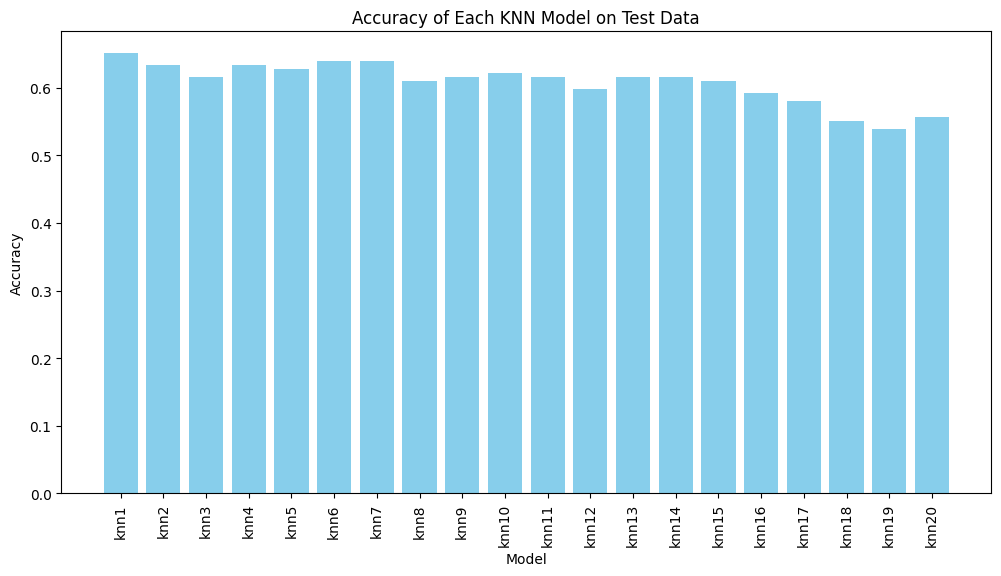

Prediction of knn1: 0
Prediction of knn2: 0
Prediction of knn3: 0
Prediction of knn4: 0
Prediction of knn5: 0
Prediction of knn6: 0
Prediction of knn7: 0
Prediction of knn8: 0
Prediction of knn9: 0
Prediction of knn10: 0
Prediction of knn11: 0
Prediction of knn12: 0
Prediction of knn13: 0
Prediction of knn14: 0
Prediction of knn15: 0
Prediction of knn16: 0
Prediction of knn17: 0
Prediction of knn18: 0
Prediction of knn19: 0
Prediction of knn20: 1
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was f

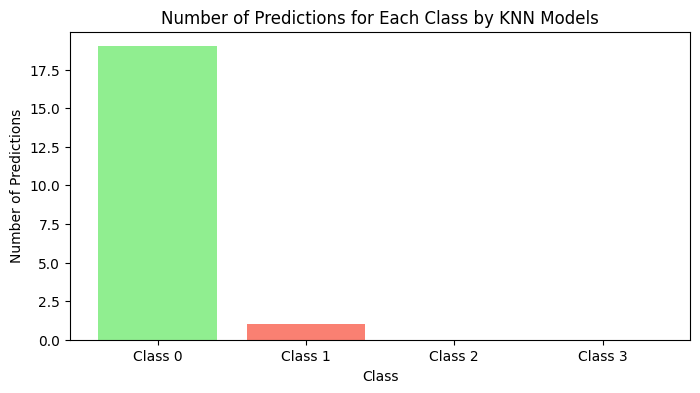

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/shared-libs/py

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# memisahkan atribut dan label
X = data.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir sebagai fitur
y = data.iloc[:, -1]   # Kolom terakhir sebagai label

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create list of estimators for StackingClassifier
estimators = [('knn' + str(i // 3), KNeighborsClassifier(n_neighbors=i)) for i in range(3, 63, 3)]

# Initialize StackingClassifier with GaussianNB as final estimator
clf = StackingClassifier(
    estimators=estimators, final_estimator=GaussianNB()
)

# Train StackingClassifier
clf.fit(X_train, y_train)

# Evaluate accuracy for each KNN model and store the results
accuracies = []
for name, estimator in estimators:
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.4f}")
    accuracies.append(accuracy)

# Plotting the accuracy of each KNN model
model_names = [name for name, _ in estimators]
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each KNN Model on Test Data')
plt.xticks(rotation=90)
plt.show()

# Evaluate predictions for new data point by each KNN model
X_new = [data.iloc[776][:-1]]
predictions = {}
for name, estimator in estimators:
    pred = estimator.predict(X_new)[0]
    predictions[name] = pred
    print(f"Prediction of {name}: {pred}")

# Counting predictions for each class
count_class_0 = sum(1 for pred in predictions.values() if pred == 0)
count_class_1 = sum(1 for pred in predictions.values() if pred == 1)
count_class_2 = sum(1 for pred in predictions.values() if pred == 2)
count_class_3 = sum(1 for pred in predictions.values() if pred == 3)

# Plotting the number of predictions for each class
plt.figure(figsize=(8, 4))
plt.bar(['Class 0', 'Class 1','Class 2', 'Class 3'], [count_class_0, count_class_1, count_class_2, count_class_3], color=['lightgreen', 'salmon', 'lightblue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Number of Predictions')
plt.title('Number of Predictions for Each Class by KNN Models')
plt.show()

# Predict for new data using StackingClassifier
prediction = clf.predict(X_new)

print(f'\nPrediction for X_new: {prediction[0]}')

# Evaluate overall performance of the stacking classifier
avg_acc = clf.score(X_test, y_test)
print(f'\nOverall Stacking Classifier Performance:')
print(f'Accuracy: {avg_acc:.4f}')

# Obtain predictions from the model
y_pred = clf.predict(X_test)


## Bagging (Bootstrap Aggregating)

Bagging melibatkan pembuatan beberapa subset dari data pelatihan dengan penggantian (bootstrap) dan melatih model yang berbeda pada setiap subset. Kemudian, hasil prediksi dari model-model ini diambil rata-rata (untuk regresi) atau diambil mayoritas (untuk klasifikasi).

<img src="image-20240626-161214.png" width="" align="" />

Metode bagging bertujuan untuk mengatasi variasi dan overfitting dalam model-machine learning. Bagging melibatkan langkah-langkah berikut:

1. Mengambil dataset pelatihan awal yang dimiliki.

2. Membuat beberapa set data pelatihan yang berbeda dengan cara mengambil sampel secara acak dari dataset awal. Setiap set data ini mungkin memiliki beberapa data yang sama dan beberapa yang berbeda.

3. Model yang sama (classifier) diterapkan pada setiap set data pelatihan ini dan menghasilkan prediksi masing-masing.

4. Hasil prediksi dari semua classifier digabungkan.

Metode bagging membantu mengurangi variabilitas dalam prediksi karena setiap set data pelatihan memiliki variasi yang berbeda. Variasi ini membuat model lebih stabil dan lebih baik kinerjanya daripada hanya menggunakan satu set data pelatihan saja.

Pada bagging digunakan 20 gaussian naive bayes yang menerima subset berbeda satu sama lain 

Estimator 1 accuracy : 0.4852
Estimator 1 memprediksi : 2

Estimator 2 accuracy : 0.5030
Estimator 2 memprediksi : 0

Estimator 3 accuracy : 0.5207
Estimator 3 memprediksi : 0

Estimator 4 accuracy : 0.5207
Estimator 4 memprediksi : 0

Estimator 5 accuracy : 0.5266
Estimator 5 memprediksi : 1

Estimator 6 accuracy : 0.4260
Estimator 6 memprediksi : 1

Estimator 7 accuracy : 0.4675
Estimator 7 memprediksi : 1

Estimator 8 accuracy : 0.4438
Estimator 8 memprediksi : 1

Estimator 9 accuracy : 0.4497
Estimator 9 memprediksi : 2

Estimator 10 accuracy : 0.4497
Estimator 10 memprediksi : 0

Estimator 11 accuracy : 0.4734
Estimator 11 memprediksi : 0

Estimator 12 accuracy : 0.5148
Estimator 12 memprediksi : 1

Estimator 13 accuracy : 0.4911
Estimator 13 memprediksi : 0

Estimator 14 accuracy : 0.5325
Estimator 14 memprediksi : 0

Estimator 15 accuracy : 0.4734
Estimator 15 memprediksi : 2

Estimator 16 accuracy : 0.5325
Estimator 16 memprediksi : 0

Estimator 17 accuracy : 0.4911
Estimator 1

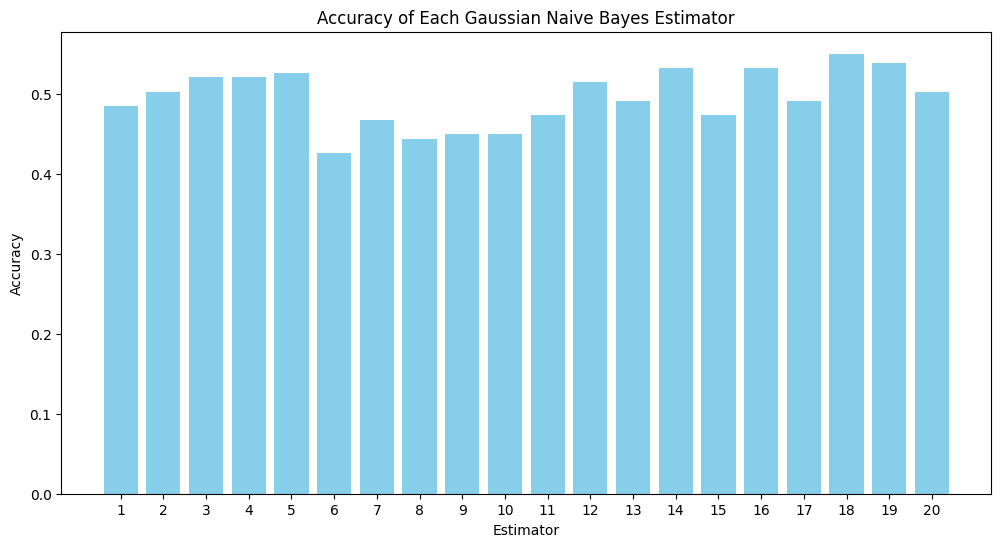

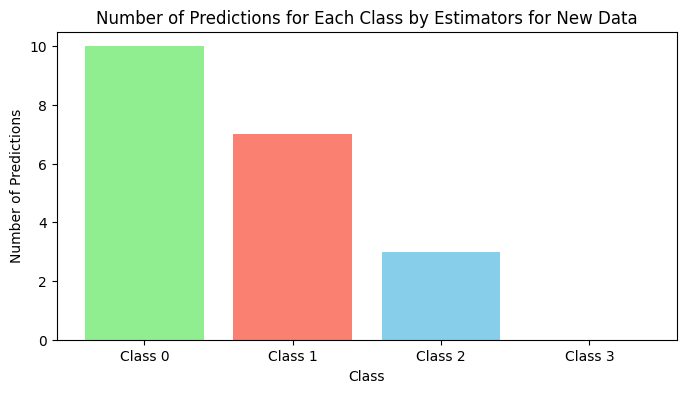

In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# memisahkan atribut dan label
X = data.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir sebagai fitur
y = data.iloc[:, -1]   # Kolom terakhir sebagai label

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Parameter bagging
n_estimators = 20
n_samples = int(len(X_train) / n_estimators)

# Inisialisasi list untuk menyimpan model dan akurasi
estimators = []
accuracies = []
pred = []

numerical_cols = ['COMPACTNESS', 'CIRCULARITY', 'DISTANCE CIRCULARITY', 'RADIUS RATIO',
                  'PR.AXIS ASPECT RATIO', 'MAX.LENGTH ASPECT RATIO', 'SCATTER RATIO',
                  'ELONGATEDNESS', 'PR.AXIS RECTANGULARITY', 'MAX.LENGTH RECTANGULARITY',
                  'SCALED VARIANCE ALONG MAJOR AXIS', 'SCALED VARIANCE ALONG MINOR AXIS',
                  'SCALED RADIUS OF GYRATION', 'SKEWNESS ABOUT MAJOR AXIS',
                  'SKEWNESS ABOUT MINOR AXIS', 'KURTOSIS ABOUT MINOR AXIS',
                  'KURTOSIS ABOUT MAJOR AXIS', 'HOLLOWS RATIO']

# Data baru yang ingin diprediksi
X_new = pd.DataFrame([data.iloc[731][:-1]], columns=numerical_cols)
# print("Data yang baru yang akan diprediksi")
# print(X_new)
# print()

np.random.seed(0)

# Membuat model Gaussian Naive Bayes untuk setiap subset
for i in range(n_estimators):
    # Membuat bootstrap sample
    bootstrap_indices = np.random.randint(0, len(X_train), n_samples)
    X_train_bootstrap = X_train.iloc[bootstrap_indices]
    y_train_bootstrap = y_train.iloc[bootstrap_indices]
    
    # Melatih model
    gnb_model = GaussianNB()
    gnb_model.fit(X_train_bootstrap, y_train_bootstrap)
    estimators.append(gnb_model)
    
    # Evaluasi model    
    bebas = gnb_model.predict(X_new)
    pred.append(bebas[0])  # Mengambil nilai prediksi dan menyimpannya di list pred
    y_pred = gnb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Estimator {i + 1} accuracy : {accuracy:.4f}")
    print(f"Estimator {i + 1} memprediksi : {int(bebas[0])}")
    print()

# Majority vote untuk prediksi data baru
pred_majority_vote = np.bincount(pred).argmax()
print(f"Majority vote prediction for new data: {pred_majority_vote}")

# Menghitung jumlah dari masing-masing kelas dalam pred
class_counts = np.bincount(pred, minlength=4)  # 4 karena kelas ada 4 (0, 1, 2, 3)
print(f"Jumlah prediksi kelas 0: {class_counts[0]}")
print(f"Jumlah prediksi kelas 1: {class_counts[1]}")
print(f"Jumlah prediksi kelas 2: {class_counts[2]}")
print(f"Jumlah prediksi kelas 3: {class_counts[3]}")

# Menghitung rata-rata akurasi dari semua estimators
average_accuracy = np.mean(accuracies)
print(f"Average accuracy of all estimators: {average_accuracy:.4f}")

# Plot accuracy untuk tiap estimator
plt.figure(figsize=(12, 6))
plt.bar(range(1, n_estimators + 1), accuracies, color='skyblue')
plt.xlabel('Estimator')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Gaussian Naive Bayes Estimator')
plt.xticks(range(1, n_estimators + 1))
plt.show()

# Plot the number of predictions pada setiap klass untuk data baru 
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
class_values = [class_counts[0], class_counts[1], class_counts[2], class_counts[3]]
plt.figure(figsize=(8, 4))
plt.bar(class_labels, class_values, color=['lightgreen', 'salmon', 'skyblue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Number of Predictions')
plt.title('Number of Predictions for Each Class by Estimators for New Data')
plt.show()

# Evaluasi

Dari keempat model dapat dilihat akurasi masing-masing model yaitu :

- Single model dengan GNB : mendapatkan akurasi 47%

- Stacking dengan KNN (model dasar) dan GNB (model meta) : mendapatkan akurasi 65%

- Bagging dengan GNB : mendapatkan akurasi 45%

- Single model dengan SVM : mendapatkan akurasi 83%

Dari Keempat model diatas dapat dilihat bahwa model terbaik adalah yang menggunakan model SVM karena mendapatkan akurasi tertinggi dari keempat model yang telah dibuat.

# Implementasi

## Menyimpan Model

Pada tahap ini akan menyimpan model dari SVM yang sudah dibuat. Tujuan dilakukan penyimpanan model adalah supaya mudah dipanggil ketika akan memasuki tahap deployment. 

Untuk library yang digunakan dalam menyimpan model yaitu pickle.

In [ ]:
import pickle

# Menyimpan model ke dalam file 'svm_classifier.pkl'
with open('svm_classifier.pkl', 'wb') as file:
    pickle.dump((svm_model), file)

# Simpan scaler ke file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

## Integrasi model dengan web

1. install library flask, dengan menjalankan perintah "pip install flask"
2. membuat file berekstensi .py, misal app.py. Nantinya aplikasi ini akan menjadi logic atau controller dari web kita.
3. didalam app.py kita panggil model yang telah kita simpan, kemudian kita tambahkan beberapa route dan logic untuk aplikasi web kita.
4. setelah itu kita membuat tampilan form untuk user menginputkan data yang akan diprediksi oleh model berserta tampilan untuk hasil prediksi.

Source code yang telah kami buat dapat diakses melalui link berikut :
https://github.com/bagusSatriaP2408/statlog-vehicle-classification.git

### Hasil Web

Link menuju website : http://statlog.bmcwaterpool.my.id/

Berikut adalah form untuk user menginputkan data yang ingin diprediksi oleh model

<img src="image-20240626-201655.png" width="" align="" />

Ketika user selesai menginputkan data dan menekan tombol "prediksi", maka user akan ditampilkan halaman prediksi

<img src="image-20240626-201858.png" width="" align="" />

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=765e96aa-c7c3-4460-a741-8b7ada20a14f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>